In [1]:
import sys

import seaborn as sns
from sklearn.cluster import KMeans

sys.path.append("..")

In [2]:
from lib import constants, data_io

df_raw = data_io.load_raw_data()
df_cleaned = data_io.load_cleaned_data()
df_encoded = data_io.load_encoded_data()

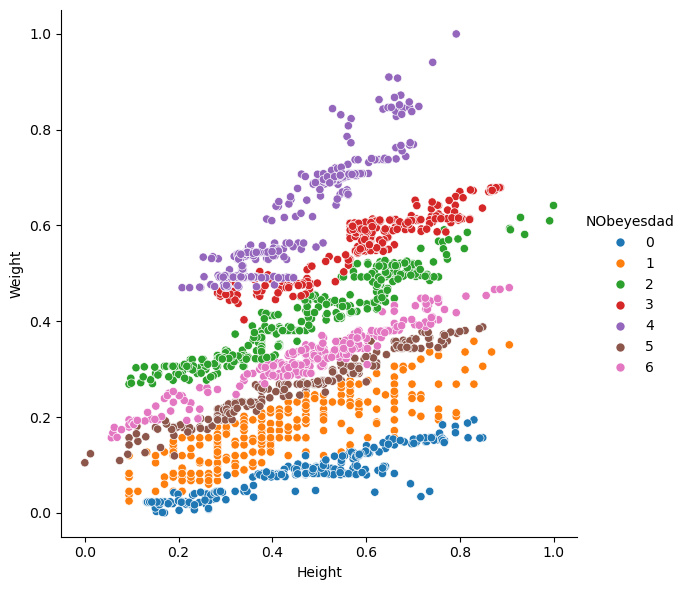

In [3]:
df_encoded_viz = df_encoded.copy()
df_encoded_viz[constants.TARGET] = df_encoded_viz[constants.TARGET].astype("category")
df_encoded_features = df_encoded.drop(columns=[constants.TARGET])


def plot_target(xlabel="Height", ylabel="Weight"):
    sns.relplot(
        x=xlabel,
        y=ylabel,
        hue=constants.TARGET,
        data=df_encoded_viz,
        height=6,
    )


plot_target()

In [4]:
def plot_clusters(df=df_encoded_features, clusters=7, xlabel="Height", ylabel="Weight"):
    kmeans = KMeans(n_clusters=clusters, random_state=42)
    df["Cluster"] = kmeans.fit_predict(df)
    df["Cluster"] = df["Cluster"].astype("category")
    sns.relplot(
        x=xlabel,
        y=ylabel,
        hue="Cluster",
        data=df,
        height=6,
    )

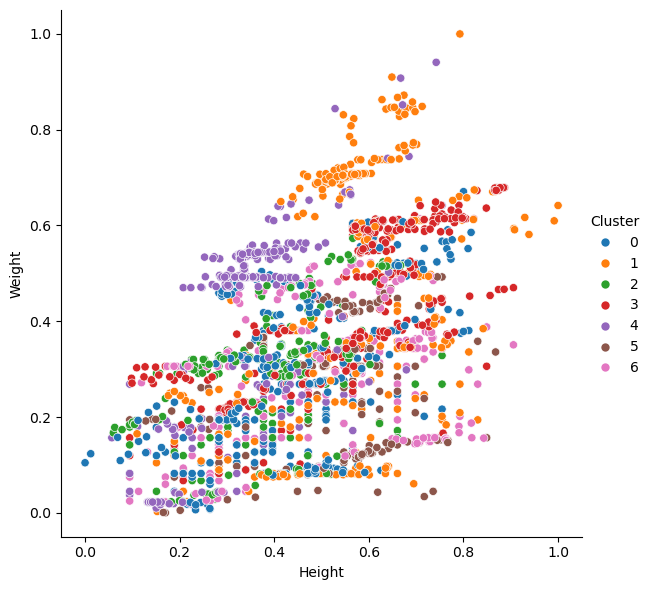

In [5]:
plot_clusters()

In [6]:
df_encoded.columns

Index(['Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC',
       'FCVC', 'NCP', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'NObeyesdad',
       'CAEC_Frequently', 'CAEC_Sometimes', 'CAEC_no', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Bike', 'MTRANS_Motorbike',
       'MTRANS_Public_Transportation', 'MTRANS_Walking', 'Gender_Male'],
      dtype='object')

/home/pbaisla/.conda/envs/dsi_participant/lib/python3.9/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


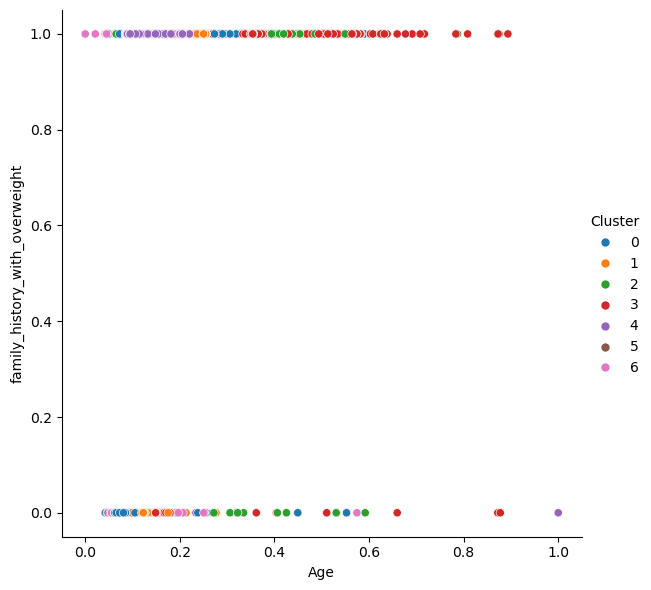

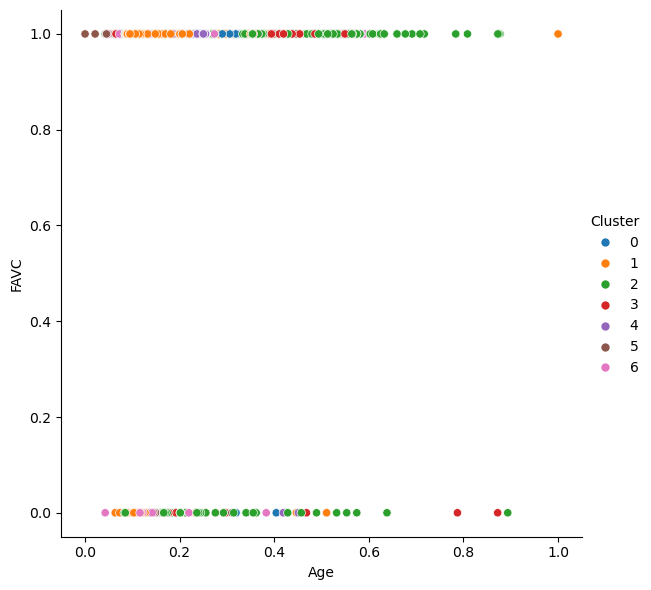

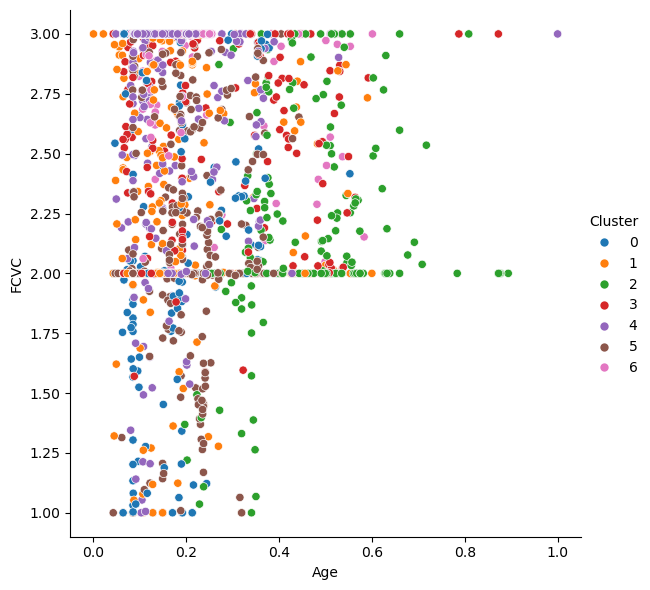

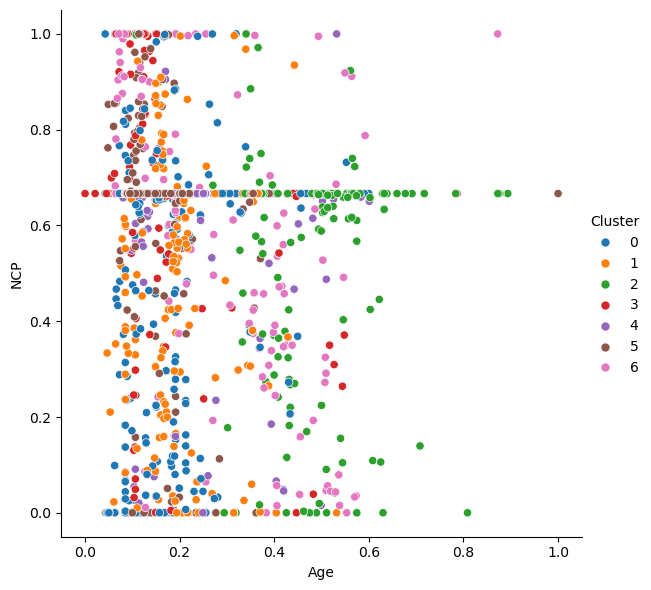

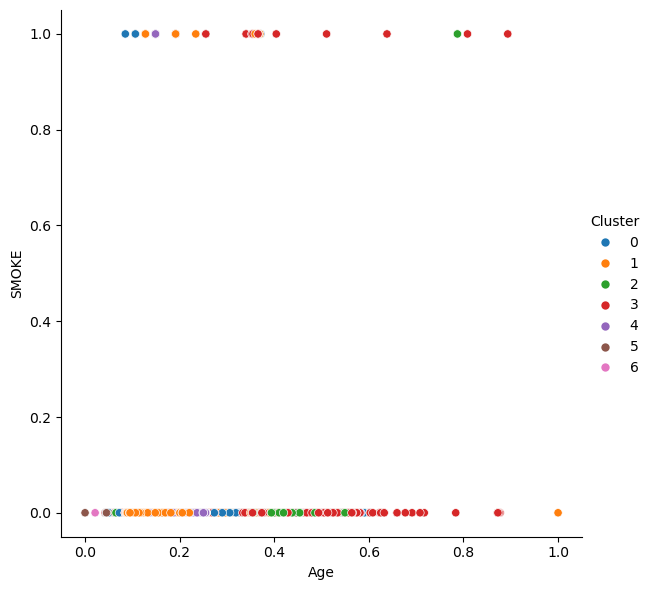

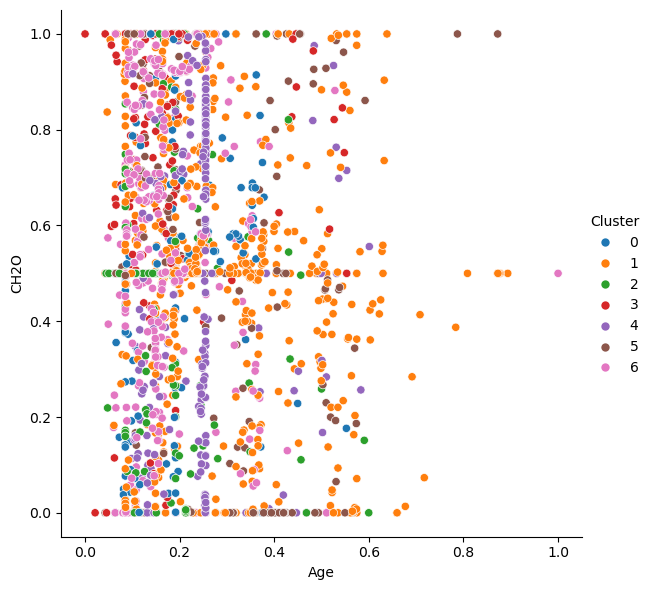

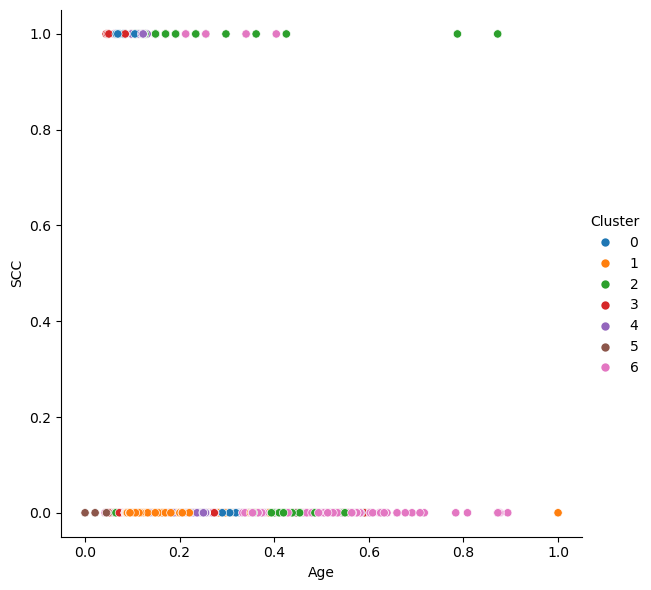

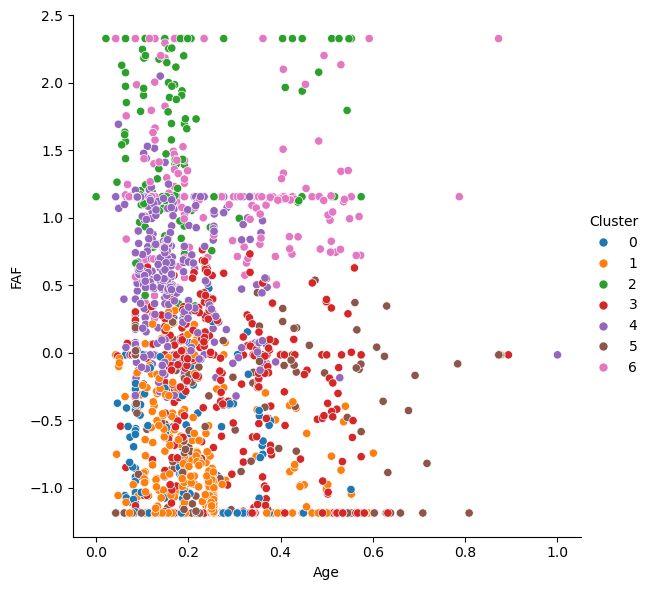

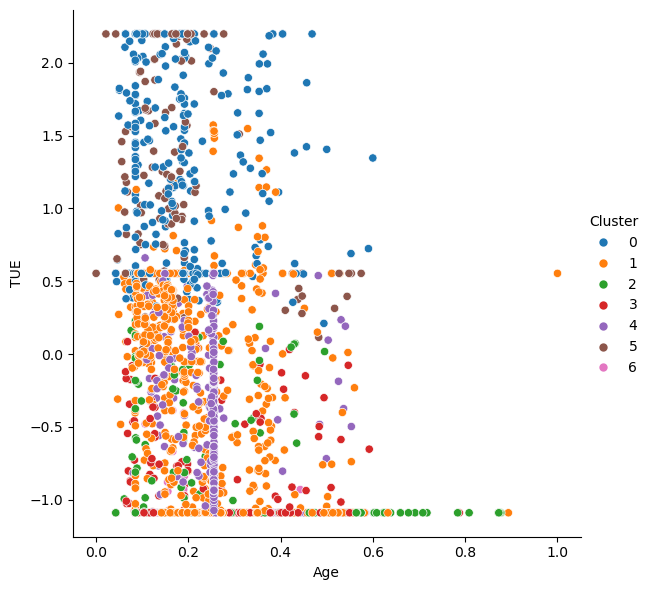

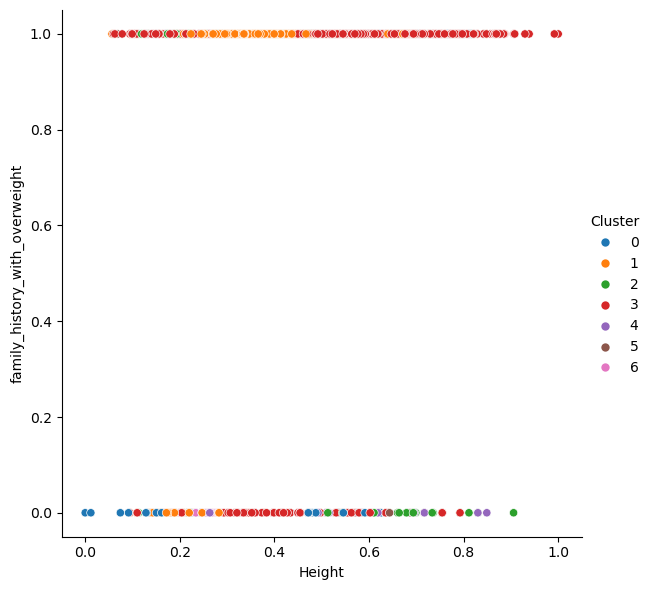

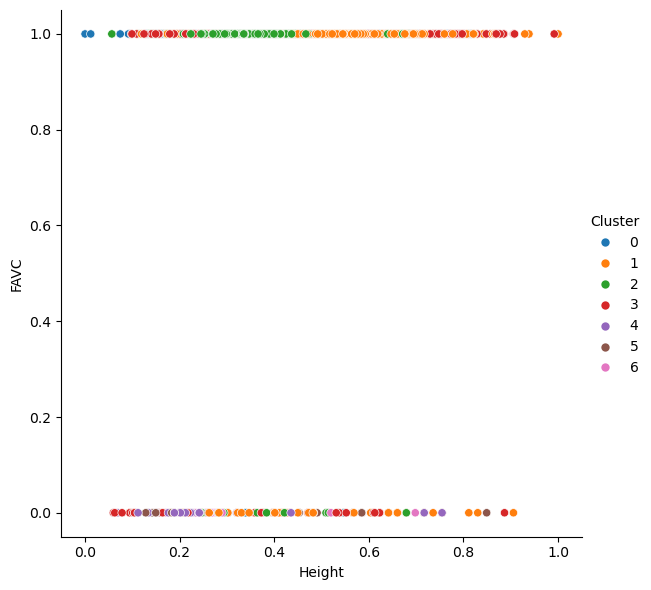

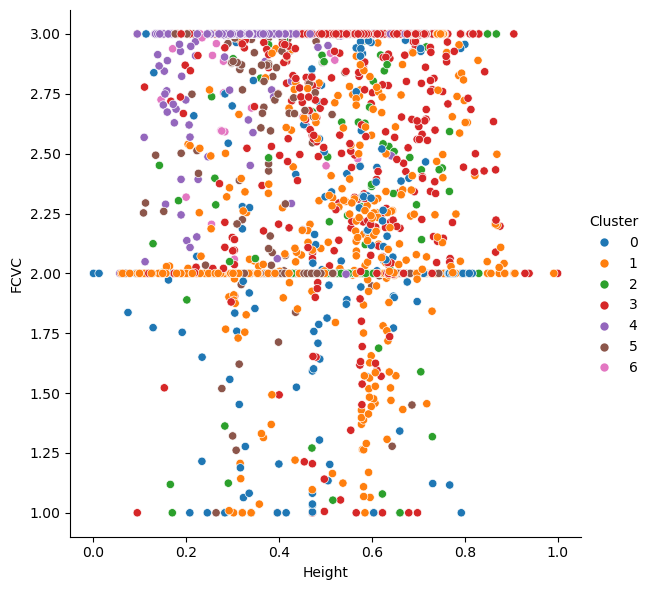

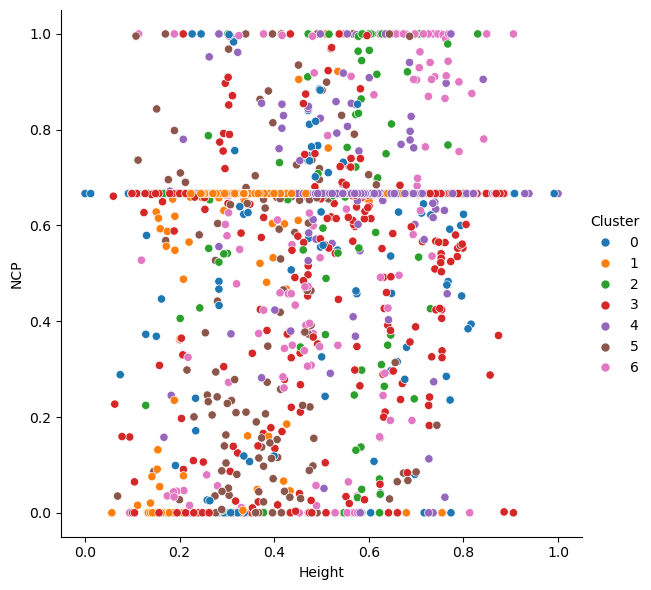

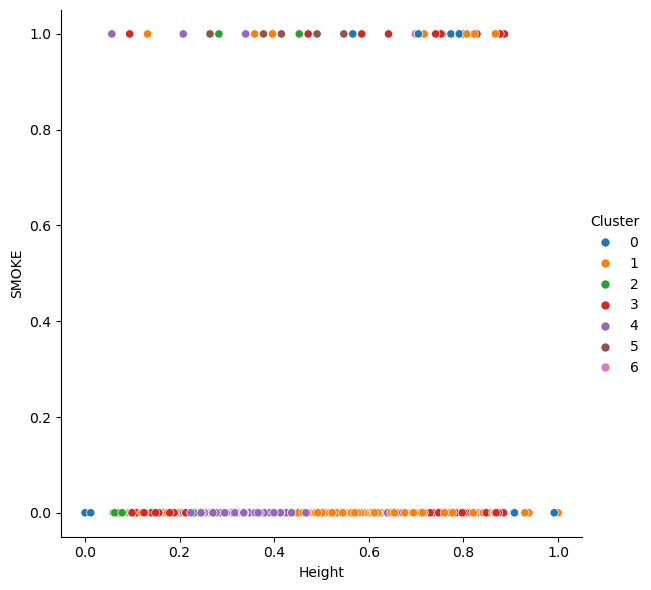

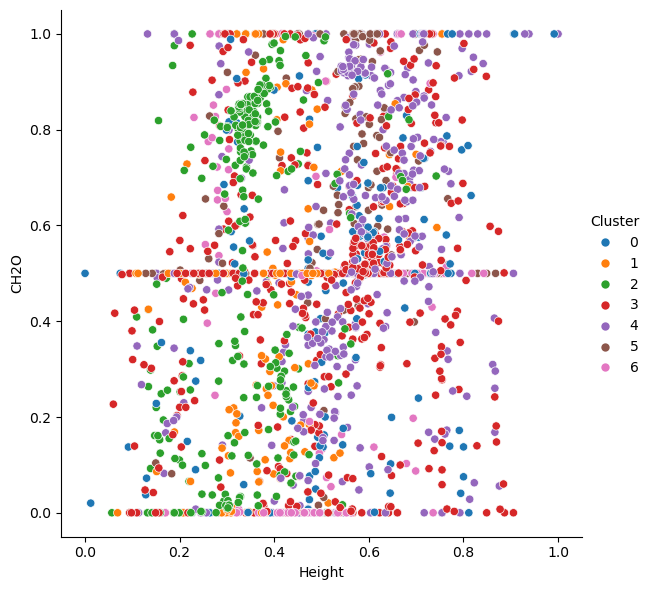

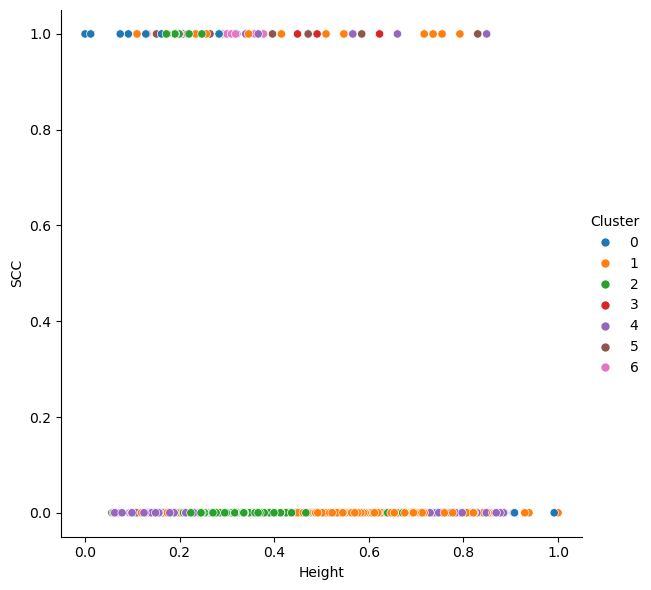

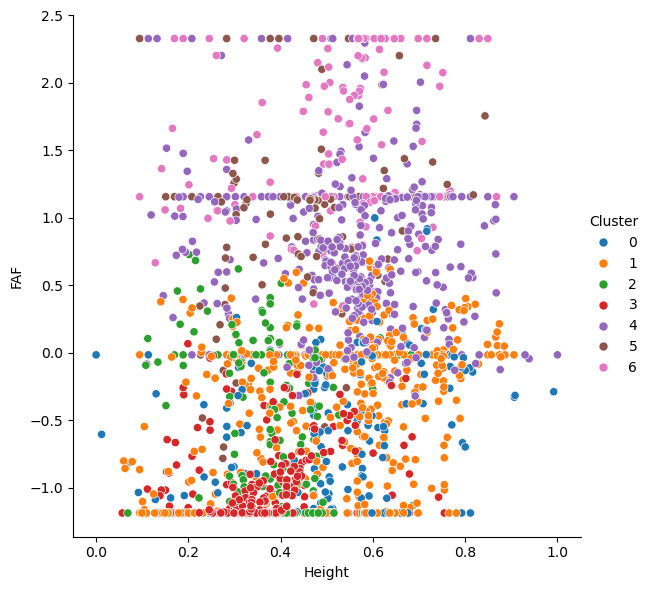

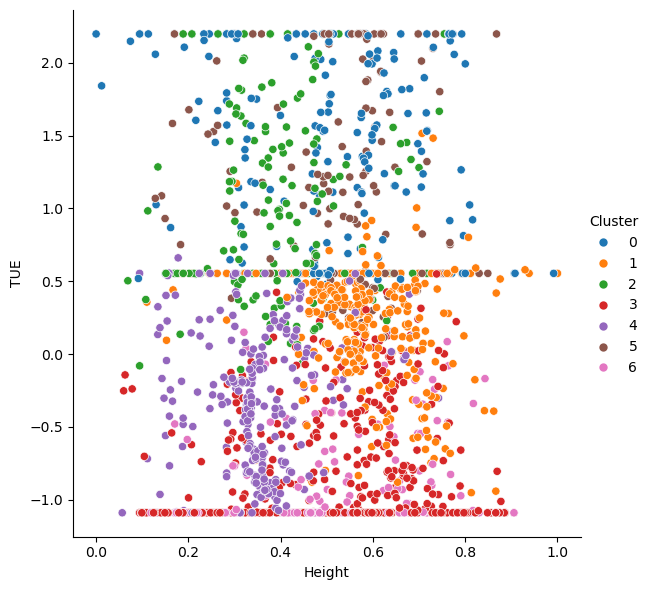

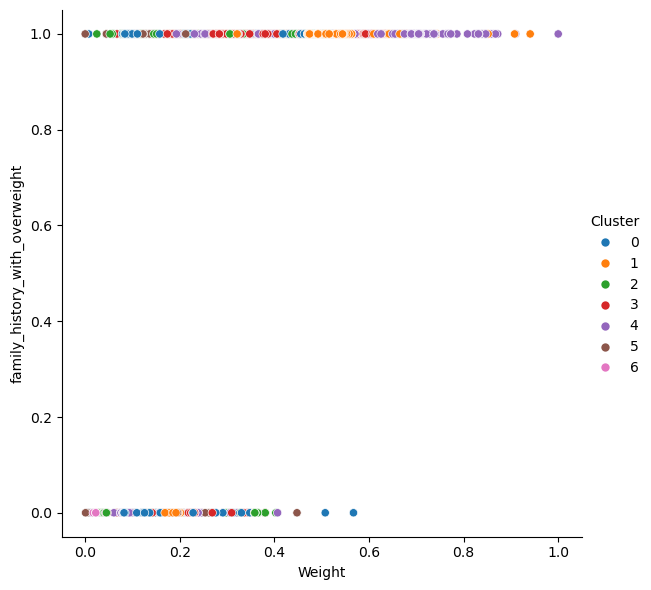

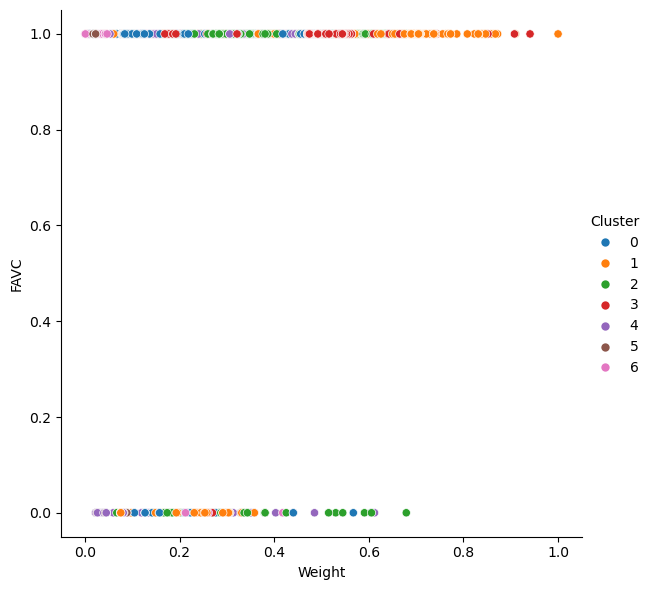

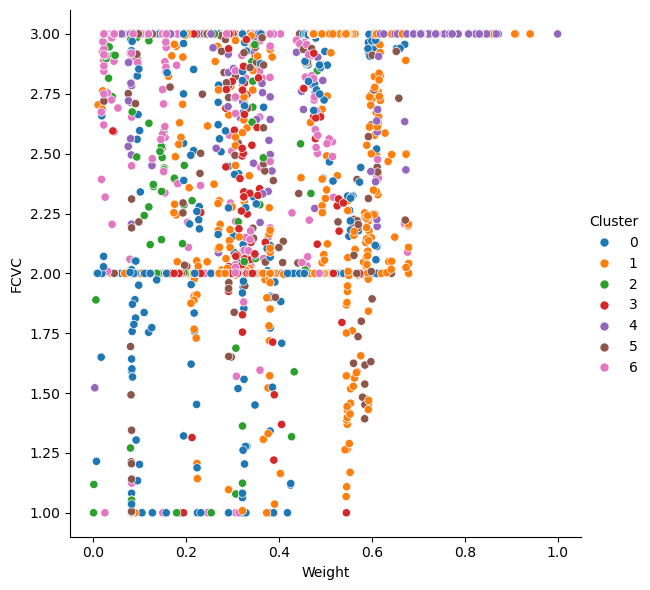

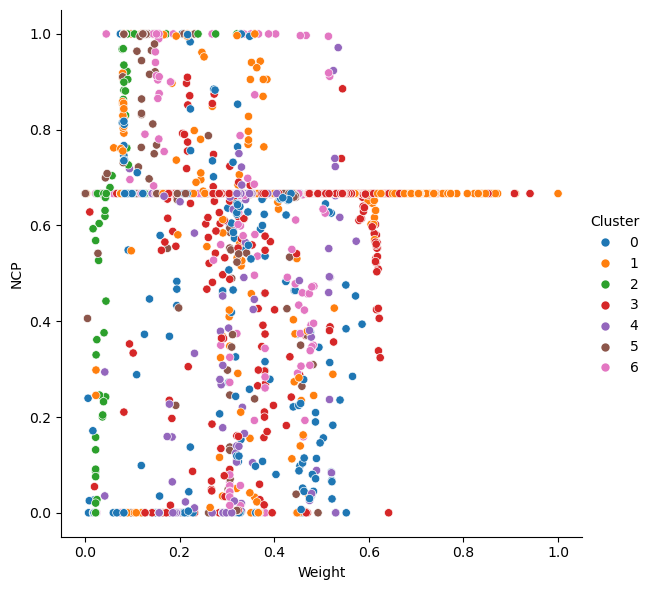

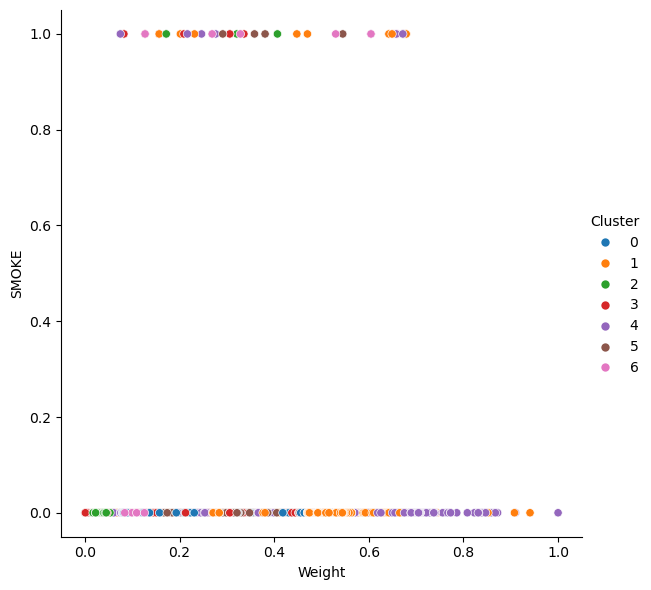

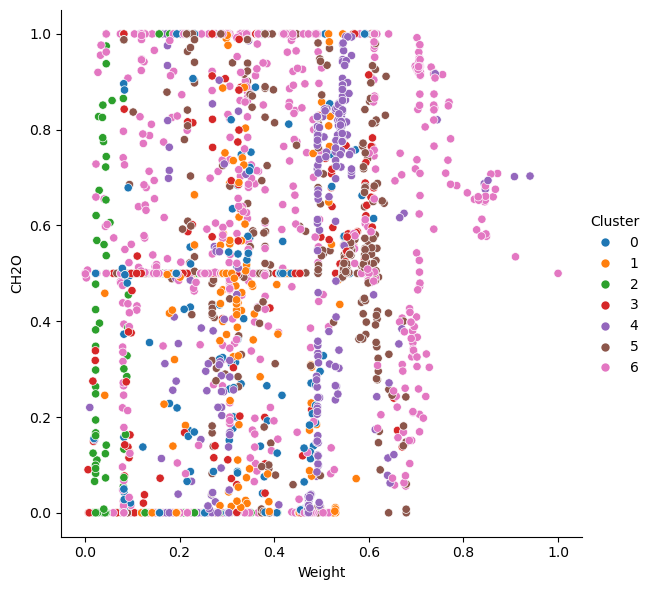

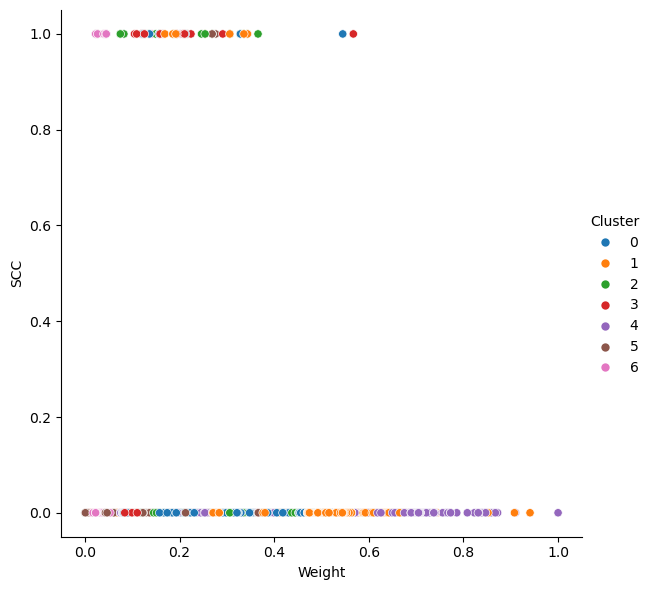

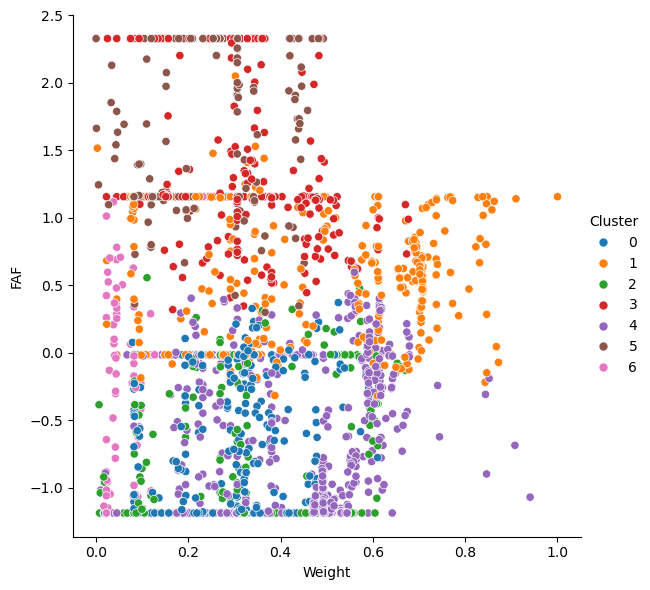

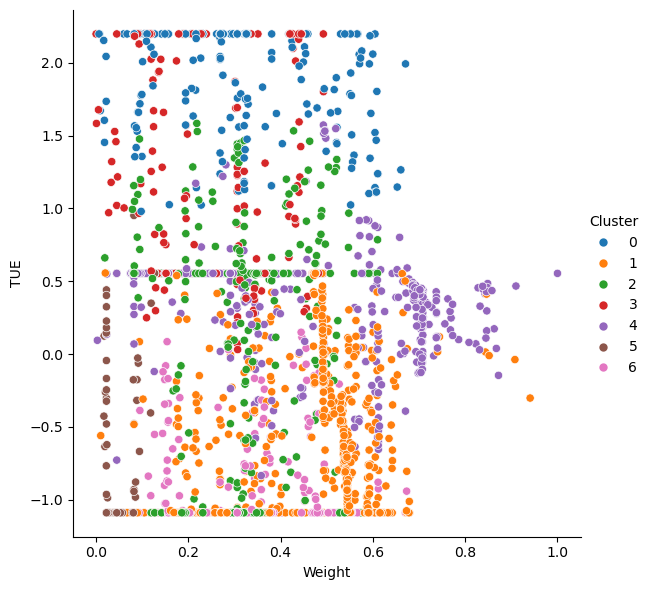

In [7]:
continuous_features = ["Age", "Height", "Weight"]
non_categorical_features = [
    "family_history_with_overweight",
    "FAVC",
    "FCVC",
    "NCP",
    "SMOKE",
    "CH2O",
    "SCC",
    "FAF",
    "TUE",
]
feature_count = len(non_categorical_features)

for i in range(len(continuous_features)):
    for j in range(len(non_categorical_features)):
        xlabel, ylabel = continuous_features[i], non_categorical_features[j]
        plot_clusters(xlabel=xlabel, ylabel=ylabel)

/home/pbaisla/.conda/envs/dsi_participant/lib/python3.9/site-packages/seaborn/axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


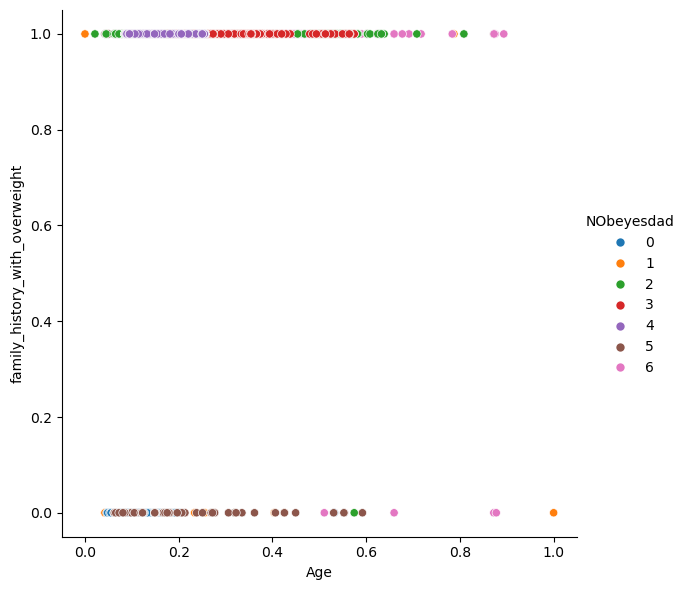

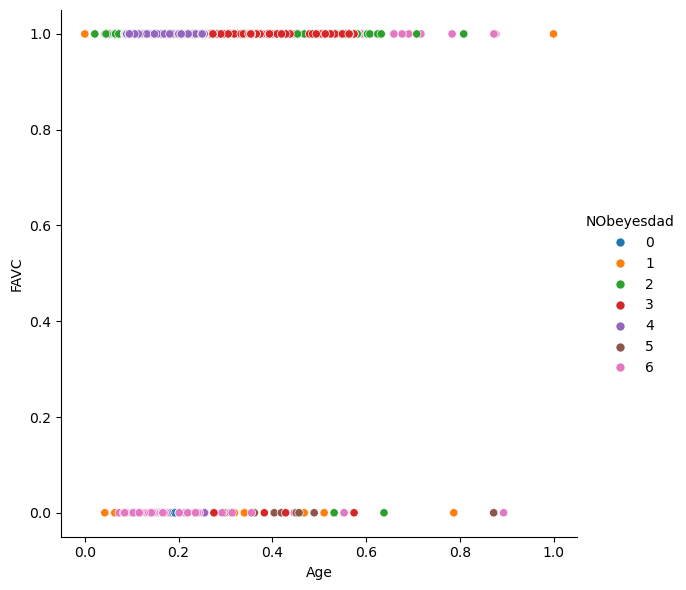

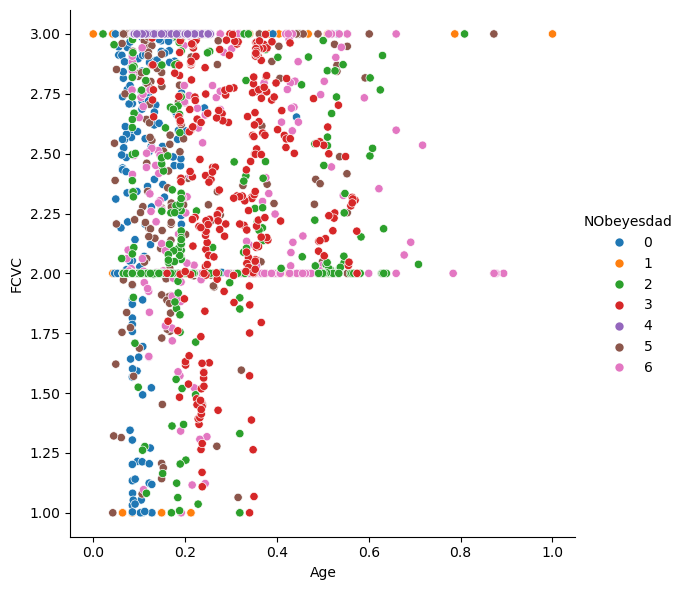

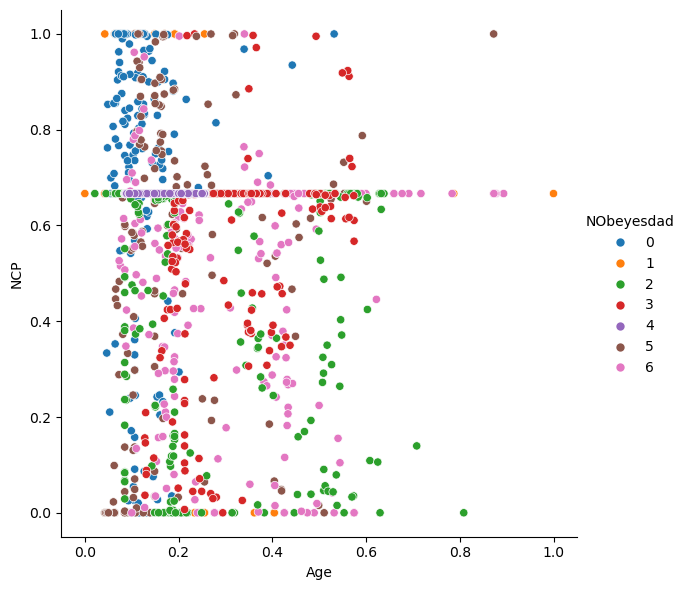

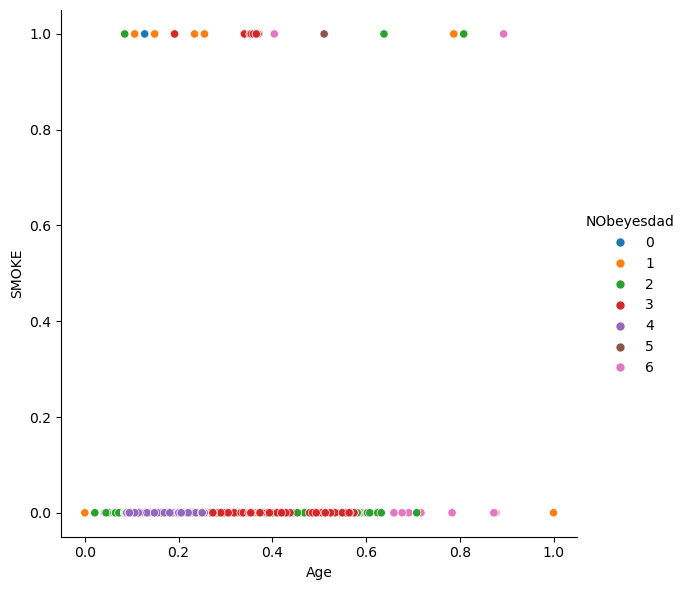

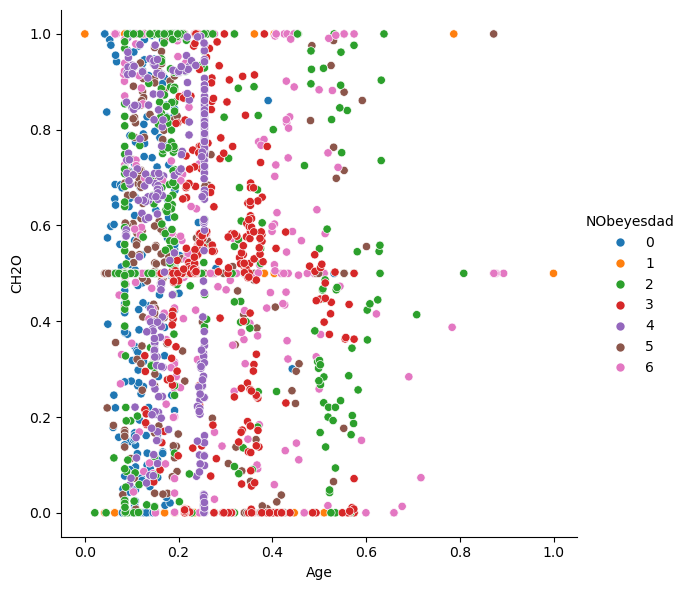

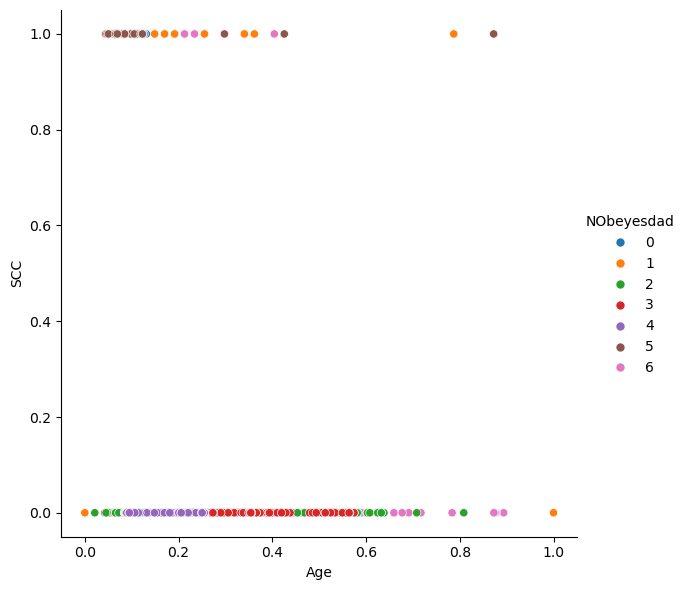

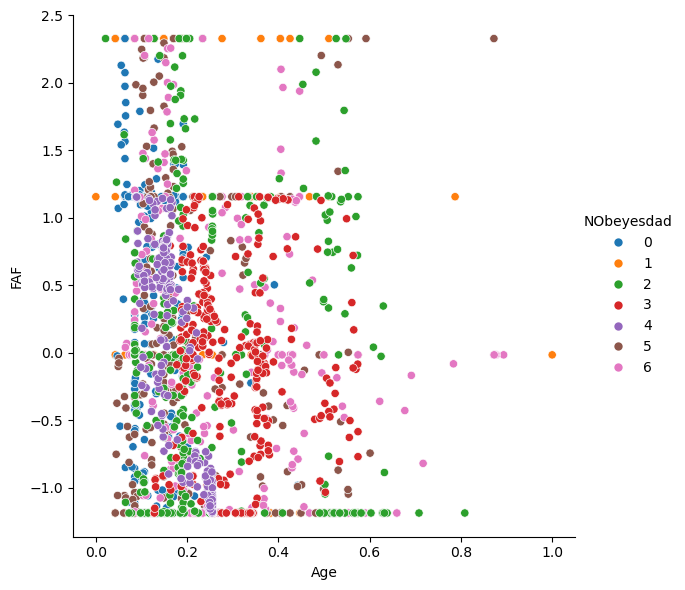

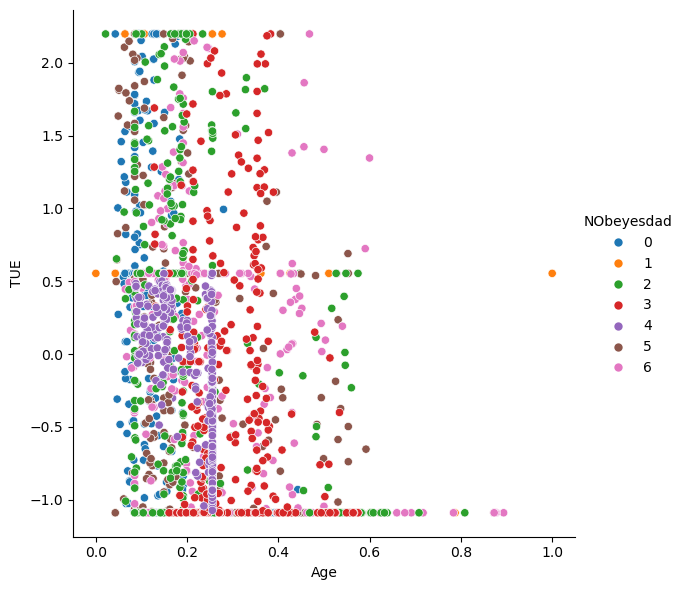

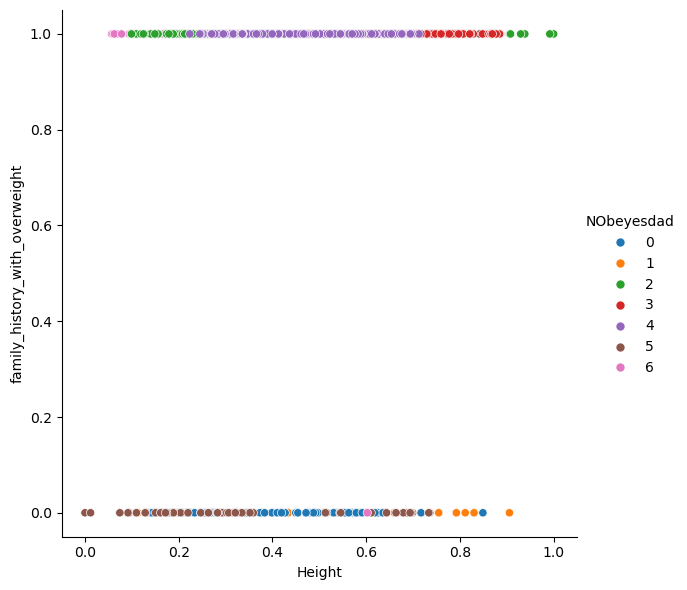

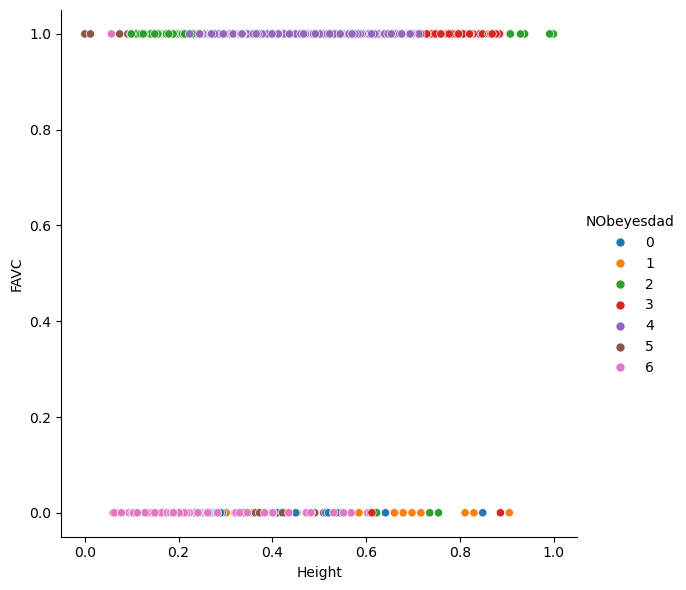

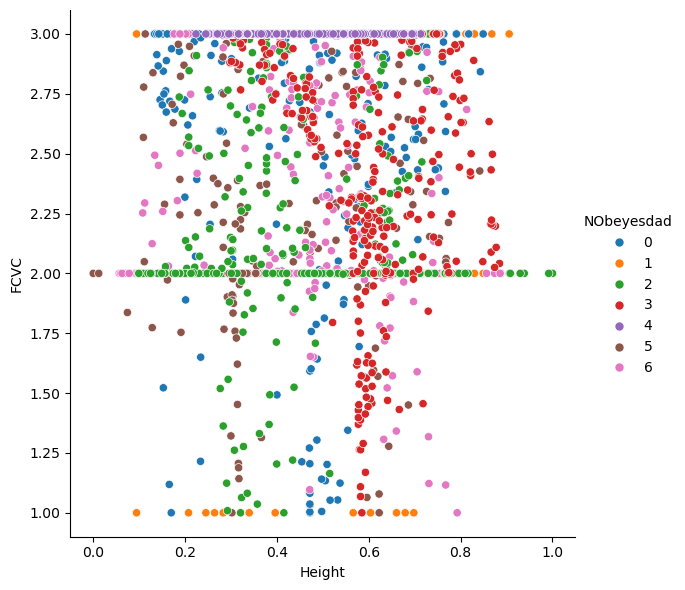

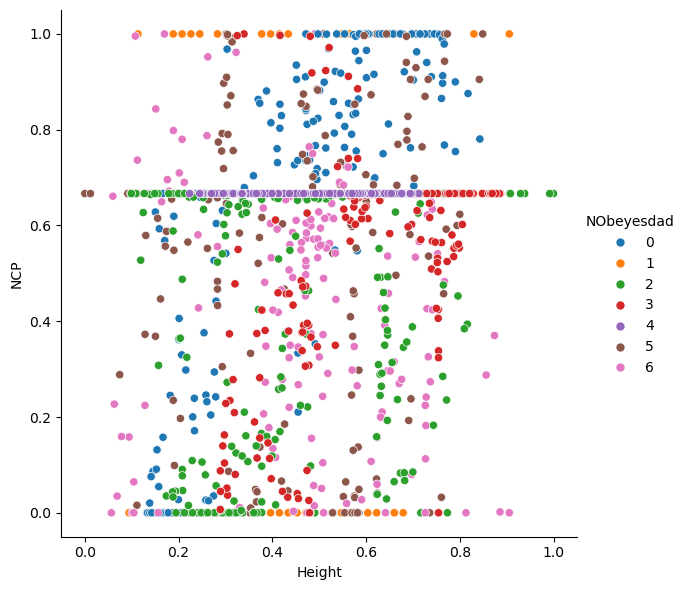

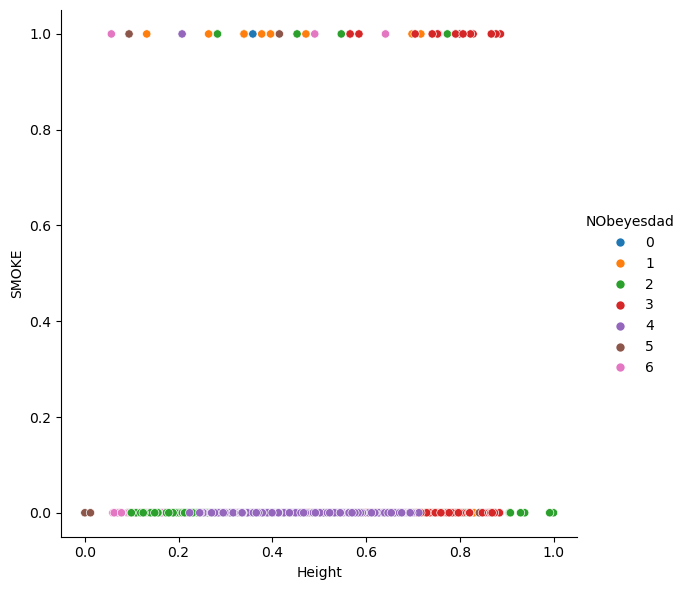

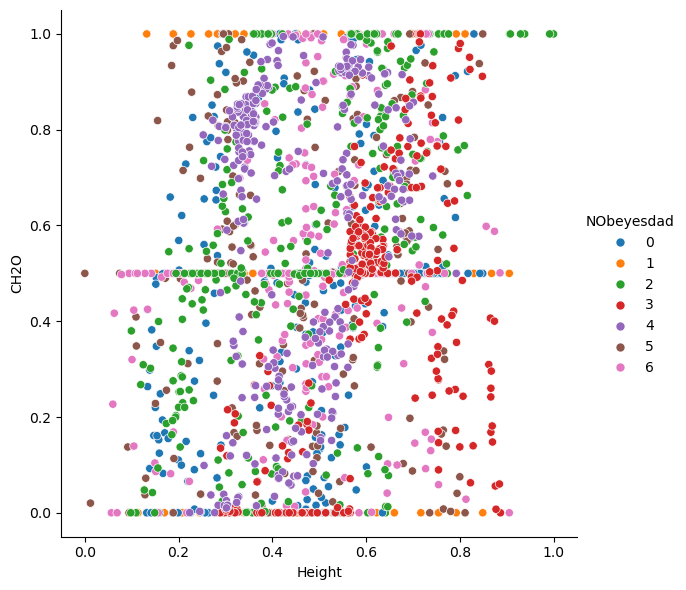

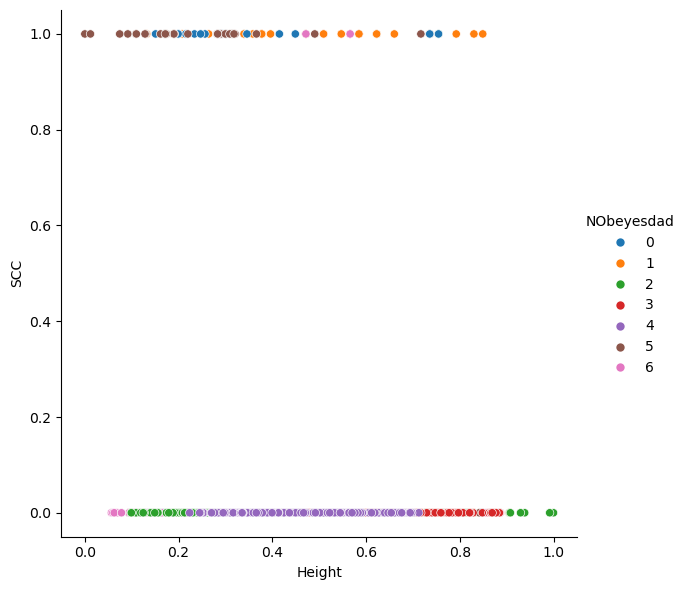

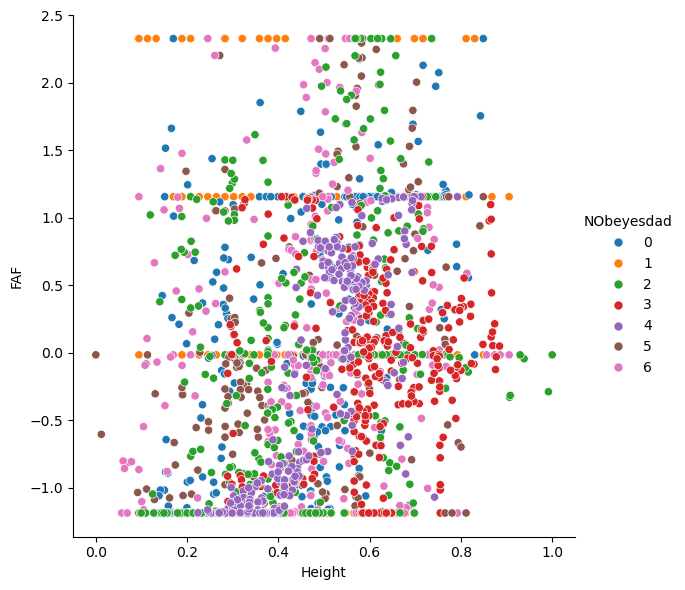

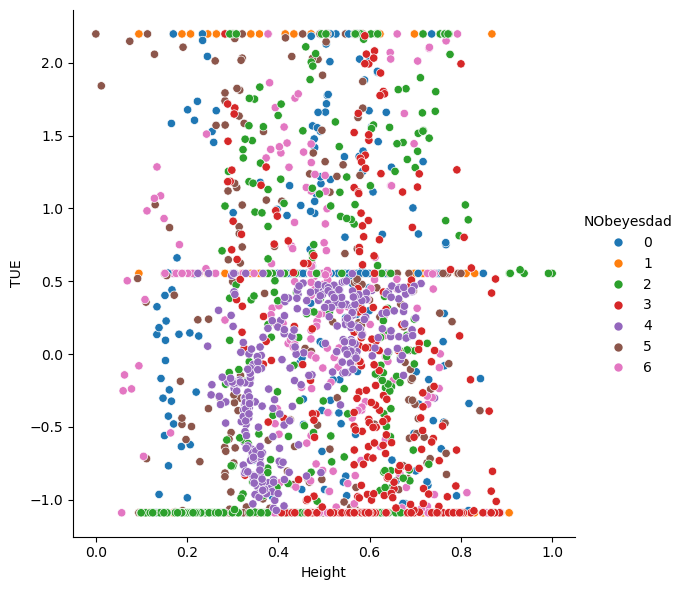

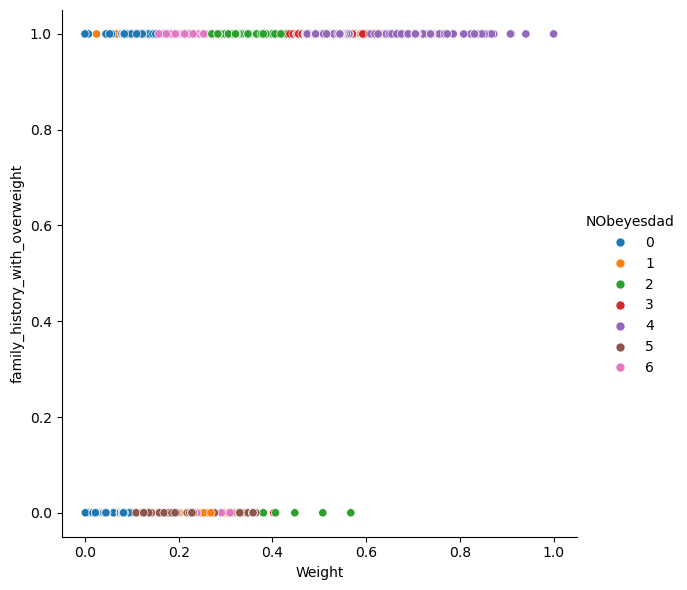

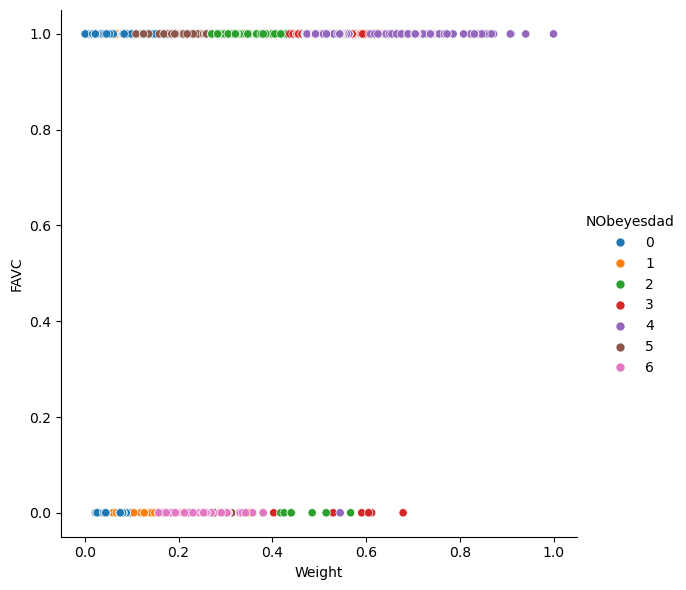

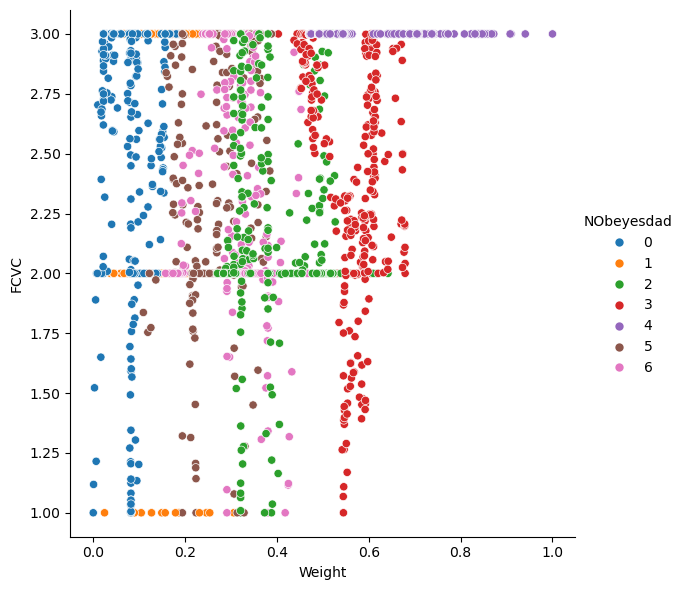

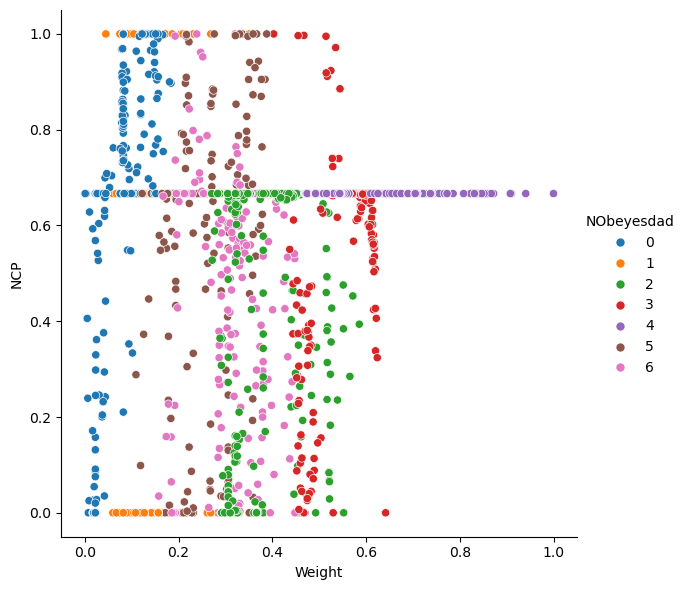

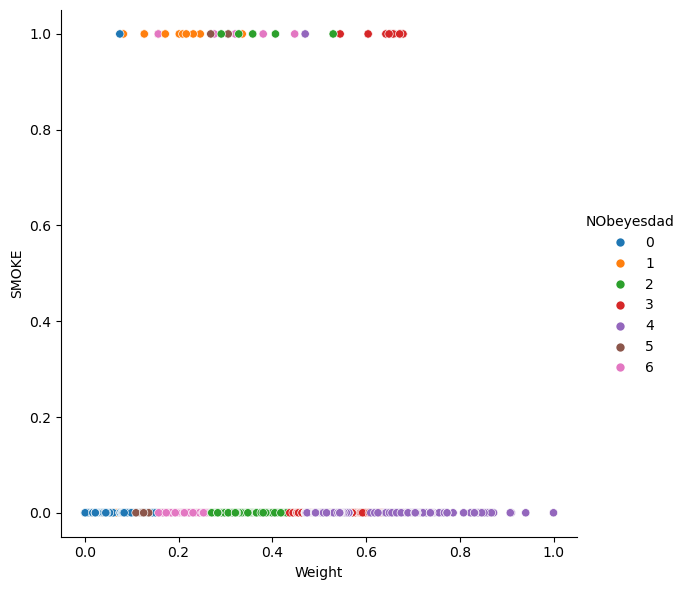

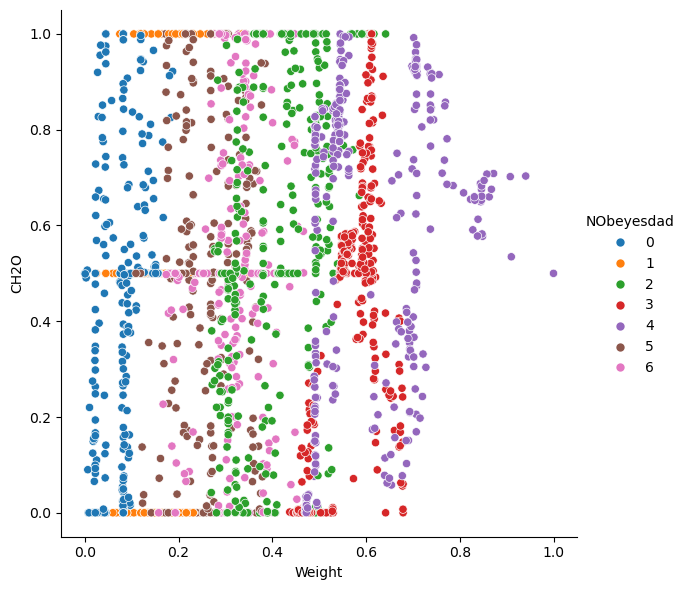

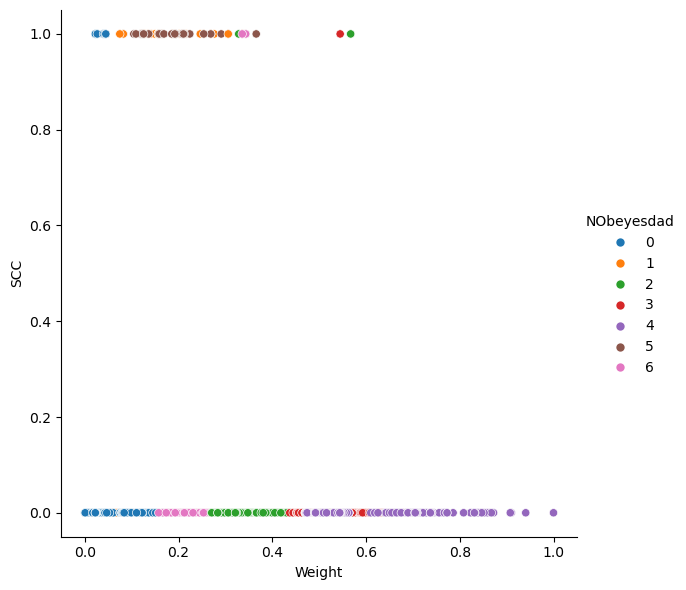

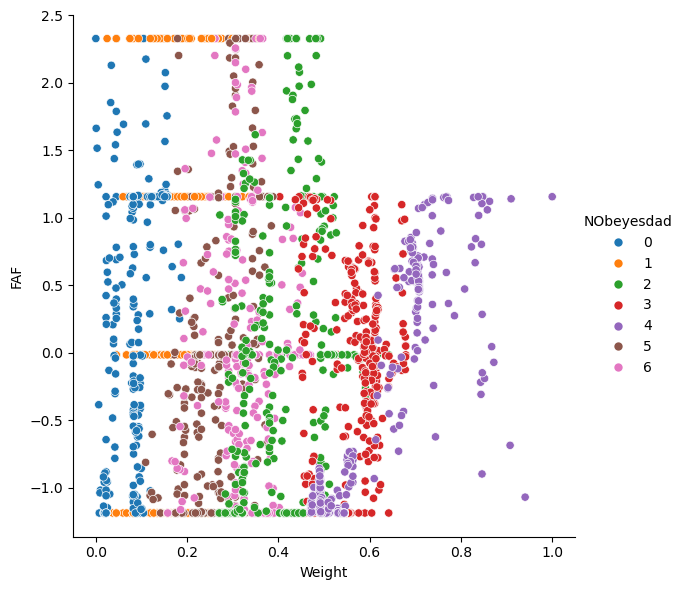

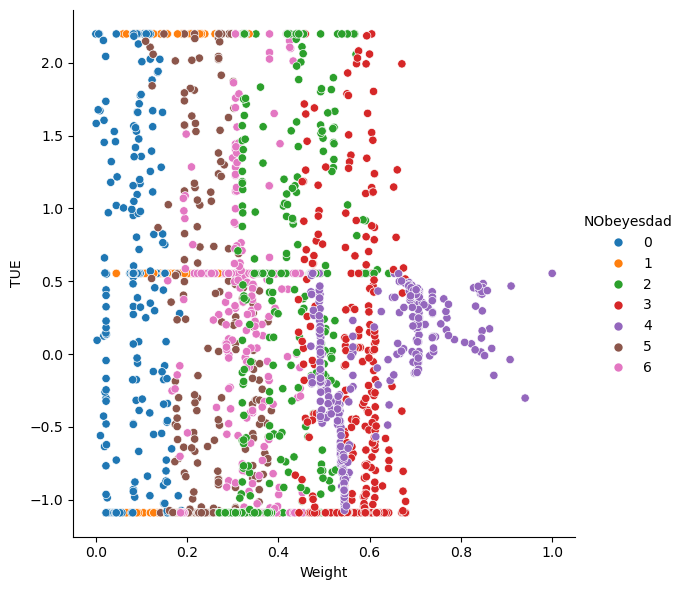

In [8]:
for i in range(len(continuous_features)):
    for j in range(len(non_categorical_features)):
        xlabel, ylabel = continuous_features[i], non_categorical_features[j]
        plot_target(xlabel=xlabel, ylabel=ylabel)